In [24]:
#Inital Imports
import numpy as np
import networkx as nx
import pandas as pd
import gurobipy as gb
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
from gurobipy import GRB

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

## Step 1: Parse Network Topology and load Demands

In [2]:
# load data fram using pandas for topology
df = pd.read_csv("data/Sprint/topology.txt", delimiter=r"\s+")

# Create Graph

G = nx.from_pandas_edgelist(df, 'from_node', 'to_node', ['capacity', 'prob_failure'])

## Step 2: Visualize Graph

{(0, 2): Text(-0.807176848394346, -0.5187410657040582, '1000000000'),
 (1, 6): Text(0.13655005118223723, -0.949726692927281, '1000000000'),
 (4, 0): Text(-0.550903900504633, 0.35404443819932263, '1000000000'),
 (4, 3): Text(-0.3985877482805049, 0.872785536415005, '1000000000'),
 (4, 5): Text(0.34946931506032664, 0.2245902732036857, '1000000000'),
 (6, 5): Text(0.6283342858426447, -0.7251364224328973, '1000000000'),
 (7, 0): Text(-0.9594929708161518, 1.76104631710583e-08, '1000000000'),
 (7, 6): Text(-0.2720389297223149, -0.3139496848585948, '1000000000'),
 (8, 3): Text(-0.11972279239934794, 0.8326908033940423, '1000000000'),
 (8, 4): Text(0.1365501256880428, 0.949726698345885, '1000000000'),
 (8, 7): Text(-0.272038944623476, 0.5956822777570254, '1000000000'),
 (9, 4): Text(0.3494693448626489, 0.7652311012678195, '1000000000'),
 (9, 8): Text(0.6283343007438058, 0.7251363682468568, '1000000000'),
 (10, 1): Text(0.42884249549647624, -0.49491071161947087, '1000000000'),
 (10, 4): Text(0.42

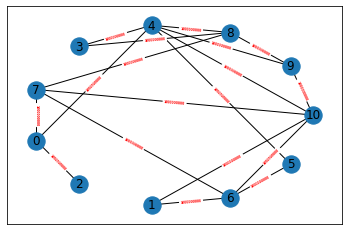

In [3]:
#Draw loaded graph
# spring layout prevents graph from
# becoming too clustered
layout = nx.circular_layout(G)
# draw node, edges, and labels sperately
nx.draw_networkx_labels(G, pos=layout)
nx.draw_networkx_nodes(G, pos=layout)
nx.draw_networkx_edges(G, pos=layout)
# only add capacities as labels
edge_labels = dict([((source, dest), G[source][dest]["capacity"]) for source, dest in G.edges])
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels= edge_labels,font_color="red", font_weight="bold", font_size = 3)

In [4]:
## Get paths
## for each node, find paths to destination node
## paths[(i,j)] = list of paths specified by edges
paths = {}

num_paths = {}

n=10

for i in range(0,n+1):
    for j in range(0,n+1):
        path_gen = nx.all_simple_edge_paths(G, source=i, target=j, cutoff=5)
        p = list(path_gen)
        num_paths[(i,j)] = len(p)
        for k in range(len(p)):
            paths[(i,j,k)] = p[k]

print(paths[1,2,0])


[(1, 10), (10, 9), (9, 4), (4, 0), (0, 2)]


## Step 3: Parse Traffic Demands

In [5]:
demands = np.loadtxt("data/Sprint/demand.txt")
## get the maximum value for each column
## reshape demands matrix
demands_matrix = np.amax(demands, axis = 0).reshape(11,11)

demands_dict = {}
for i in range(11):
    for j in range(11):
        demands_dict[(i,j)] = demands[i][j]

## Step 4: Traffic Algorithm: Maximize Total Throughput


In [21]:
#TODO
#Decision variables:

#edge current flows and capacities
flow_matrix = {}
capacity_matrix = {}
for key, value in edge_labels:
    flow_matrix[key] = 0
    capacity_matrix[key] = value



# edge_time, demand = demands_dict


#If flow is 0, edge is not active

#for each edge in edges: set in some array/matrix all the possible edges

#----------------------------

#Optimization function:

#Sum of the flows of all of the edges

model = gb.Model()

edges,capacities = edge_labels.keys(), edge_labels.values()

print(edges)

flow = model.addVars(edges, obj=capacities, name="flow")

model.setObjective(gb.quicksum(flow_matrix.values()), gb.GRB_MAXIMIZE)


#----------------------------

#Constraints: 

#Capacity check: Flow on edge (u, v) <= capacity (u, v)

#Demand reqs: flow into node u = demand u: f_in(u) - f_out(u) = demand(u) https://www.cs.cmu.edu/~ckingsf/bioinfo-lectures/flowext.pdf

#Conservation: Flow into node u = flow out of node u???

# model.addConstr(flow_matrix[(t, u, v)] <= capacity_matrix[t, u, v]])
# model.addConstr(flow_in[t, u] - flow_out[t, u])

dict_keys([(10, 9), (10, 1), (10, 7), (10, 6), (10, 4), (9, 8), (9, 4), (8, 3), (8, 7), (8, 4), (4, 3), (4, 0), (4, 5), (7, 0), (7, 6), (0, 2), (1, 6), (6, 5)])


AttributeError: module 'gurobipy' has no attribute 'GRB_MAXIMIZE'

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2373675
Academic license - for non-commercial use only - registered to klw248@cornell.edu
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1038NG7 CPU @ 2.00GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Academic license - for non-commercial use only - registered to klw248@cornell.edu
Optimize a model with 139 rows, 1734 columns and 8942 nonzeros
Model fingerprint: 0xfedc8505
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+03, 1e+09]
Presolve removed 139 rows and 1734 columns
Presolve time: 0.07s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.2145631e+06   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.07 seconds (0.00 work units)
Optimal 

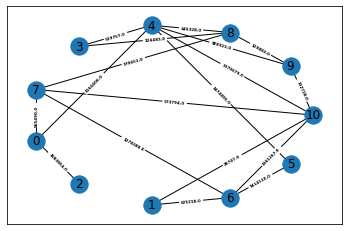

In [6]:
# new model
m = gb.Model("step4")

# add a variable for each tunnel
path_vars = m.addVars(paths, name = "path_flow")

# dictionary mapping edges to variables representing paths edge is in
edge_flow = gb.tupledict([((source, dest), []) for source, dest in G.edges])


# iterate through all paths
for (i,j,k) in path_vars:
    path = paths[(i,j,k)]
    # iterate each edge in a path
    for src,dest in path:
        # add variable to correct edge
        if (src,dest) in edge_flow:
            edge_flow[(src,dest)].append(path_vars[i,j,k])
        else:
            edge_flow[(dest,src)].append(path_vars[i,j,k])

# add capacity constraint
for i,j in edge_flow:
    m.addConstr(sum(edge_flow[(i,j)]) <= edge_labels[(i,j)])
#add demand constraint
m.addConstrs(path_vars.sum(i,j,'*') <= demands[i][j] for i,j in demands_dict)

m.setObjective(path_vars.sum(), GRB.MAXIMIZE)

m.optimize()

path_vars

G_Prime = nx.Graph()

for path_key in path_vars:
    path = paths[path_key]
    val = round(path_vars[path_key].X,0)
    print(val)
    for (src, dest) in path:
        if G_Prime.has_edge(src, dest):
            G_Prime[src][dest]['weight'] += val
        else:
            G_Prime.add_edge(src, dest, weight = val)
        
GPrime_labels = nx.get_edge_attributes(G_Prime, "weight")



# draw node, edges, and labels sperately
nx.draw_networkx_labels(G_Prime, pos=layout)
nx.draw_networkx_nodes(G_Prime, pos=layout)
nx.draw_networkx_edges(G_Prime, pos=layout)
# only add flows as labels
edge_labels = dict([((source, dest), G[source][dest]["capacity"]) for source, dest in G.edges])
nx.draw_networkx_edge_labels(G_Prime, pos=layout, edge_labels= GPrime_labels, font_weight="bold", font_size = 4)
print(sorted(G_Prime.edges(data=True),key= lambda x: x[2]['weight'],reverse=True))



## Step 5: Traffic Algorithm: Maximize Link Utilization

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1038NG7 CPU @ 2.00GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Academic license - for non-commercial use only - registered to klw248@cornell.edu
Optimize a model with 157 rows, 1735 columns and 16168 nonzeros
Model fingerprint: 0xf9a2a885
Variable types: 1735 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e-09, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+03, 1e+09]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 2 objectives (1 combined) ...
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Multi-objectives: optimize objective 1 (weighted) ...
---------------------------------------------------------

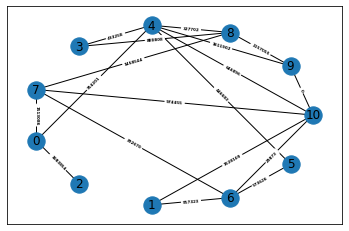

In [7]:
#Same as step 4 on a new model
m_prime = gb.Model("step5")
path_vars5 = m_prime.addVars(paths, name = "path_flow")
edge_flow5 = gb.tupledict([((source, dest), []) for source, dest in G.edges])

for (i,j,k) in path_vars5:
    path = paths[(i,j,k)]
    for src,dest in path:
        if (src,dest) in edge_flow5:
            edge_flow5[(src,dest)].append(path_vars5[i,j,k])
        else:
            edge_flow5[(dest,src)].append(path_vars5[i,j,k])

# add capacity constraint
for i,j in edge_flow5:
    m_prime.addConstr(sum(edge_flow5[(i,j)]) <= edge_labels[(i,j)])


#***new for step 5*** Need to add constraint that the maximum link value needs to be reduced 

# add variable for MLU
MLU = m_prime.addVar(vtype=GRB.CONTINUOUS, name="MLU")
# add constraint that all link utilizations must be <= MLU
for i, j in edge_flow5:
    m_prime.addConstr(sum(edge_flow5[(i,j)])/edge_labels[(i,j)] <= MLU)
# minimize MLU while encouraging meeting demands, total flow over total demand
total_demand = np.sum(demands_matrix)
#m_prime.setObjective(MLU - path_vars5.sum()/total_demand, GRB.MINIMIZE)

#having demand bounded like this will push all nodes to have "0" for flow, so we want to maximize the throughput as well (which is why we reuse step 4 constraints)

m_prime.addConstrs(path_vars5.sum(i,j,'*') <= demands[i][j] for i,j in demands_dict)

#primary objective

m_prime.setObjectiveN(MLU, 0)

#secondary objective, must minimze, so negate throughput
m_prime.setObjectiveN(-path_vars5.sum(), 1)

#m_prime.setObjectiveN(path_vars5.sum(), index=1, GRB.MAXIMIZE)

m_prime.optimize()

path_vars5

print(MLU)

#Alternative written of step 4 visualization using edge_flows:
G_Prime2 = nx.Graph()

for i,j in edge_flow5:
    G_Prime2.add_edge(i, j, weight = round(sum(edge_flow5[i,j]).getValue()))

GPrime2_labels = nx.get_edge_attributes(G_Prime2, "weight")
# draw node, edges, and labels sperately
nx.draw_networkx_labels(G_Prime2, pos=layout)
nx.draw_networkx_nodes(G_Prime2, pos=layout)
nx.draw_networkx_edges(G_Prime2, pos=layout)
# only add capacities as labels
nx.draw_networkx_edge_labels(G_Prime2, pos=layout, edge_labels= GPrime2_labels, font_weight="bold", font_size = 4)
print(sorted(G_Prime2.edges(data=True),key= lambda x: x[2]['weight'],reverse=True))


## Step 6: Compare Algorithms

TODO

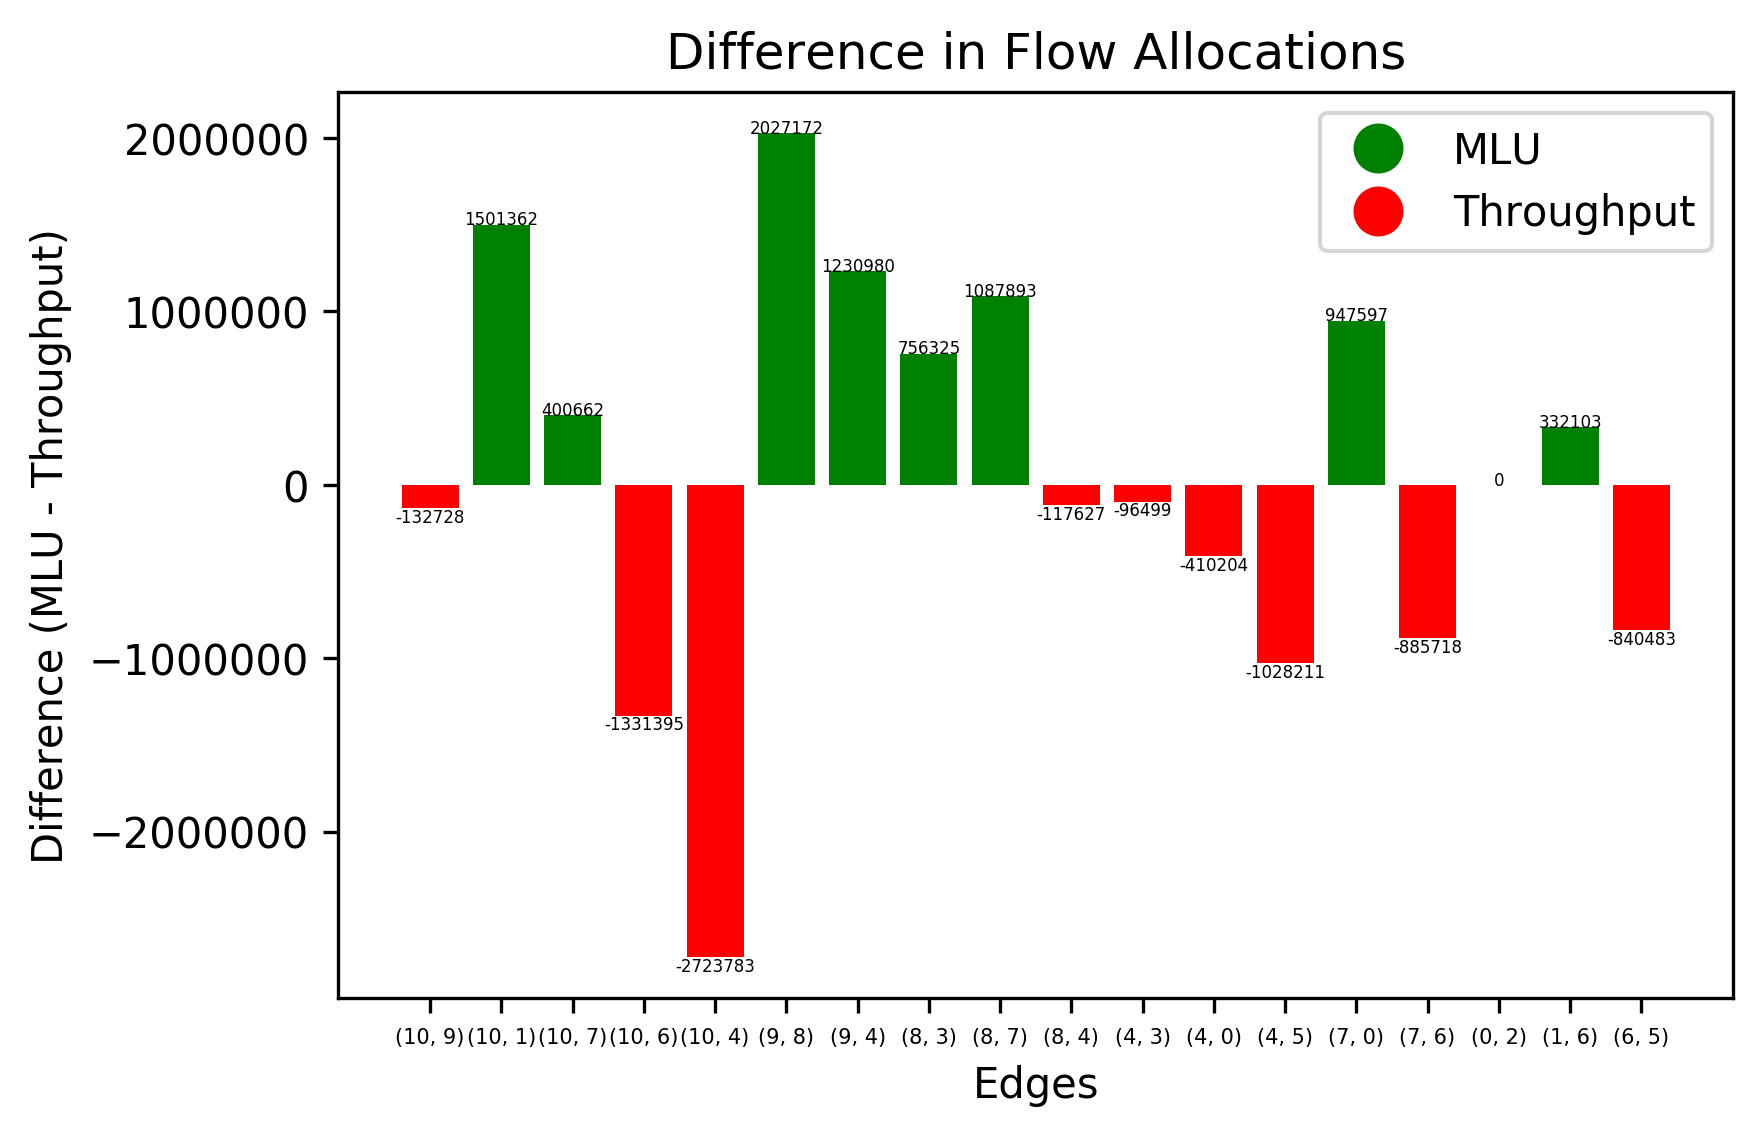

In [50]:
edge_flow_5 = {}
for i, j in edge_flow5:
    edge_flow_5[(i, j)] = round(sum(edge_flow5[i, j]).getValue())
edge_flow_4 = {}
for i, j in edge_flow:
    edge_flow_4[(i , j)] = round(sum(edge_flow[i, j]).getValue())
flow_dif = {}
edges = []
for i, j in edge_flow_4:
    edges.append((i, j))
    flow_dif[i, j] = edge_flow_5[i, j] - edge_flow_4[i, j]
fig, ax = plt.subplots()
ax.set_title('Difference in Flow Allocations')
ax.set_xlabel('Edges')
ax.set_ylabel('Difference (MLU - Throughput)')
ax.bar(range(len(flow_dif.keys())), flow_dif.values(), color=['g' if x > 0 else 'r' for x in flow_dif.values()])
plt.xticks(range(len(flow_dif.keys())), flow_dif.keys(), fontsize=5)

legend_handles = [Line2D([0], [0], linewidth=0, marker='o', markerfacecolor=color, markersize=12, markeredgecolor='none')
                  for color in ['g', 'r']]
ax.legend(legend_handles, ['MLU', 'Throughput'])

above = []
below = []
for i in range(len(flow_dif.values())):
    if list(flow_dif.values())[i] < 0:
        below.append(i)
    else:
        above.append(i)

for i in range(len(flow_dif.keys())):
    if i in above:
        plt.text(i, list(flow_dif.values())[i], list(flow_dif.values())[i], ha='center', fontsize=4)
    else:
        plt.text(i, list(flow_dif.values())[i], list(flow_dif.values())[i], ha='center', va='top', fontsize=4)
        
plt.show()

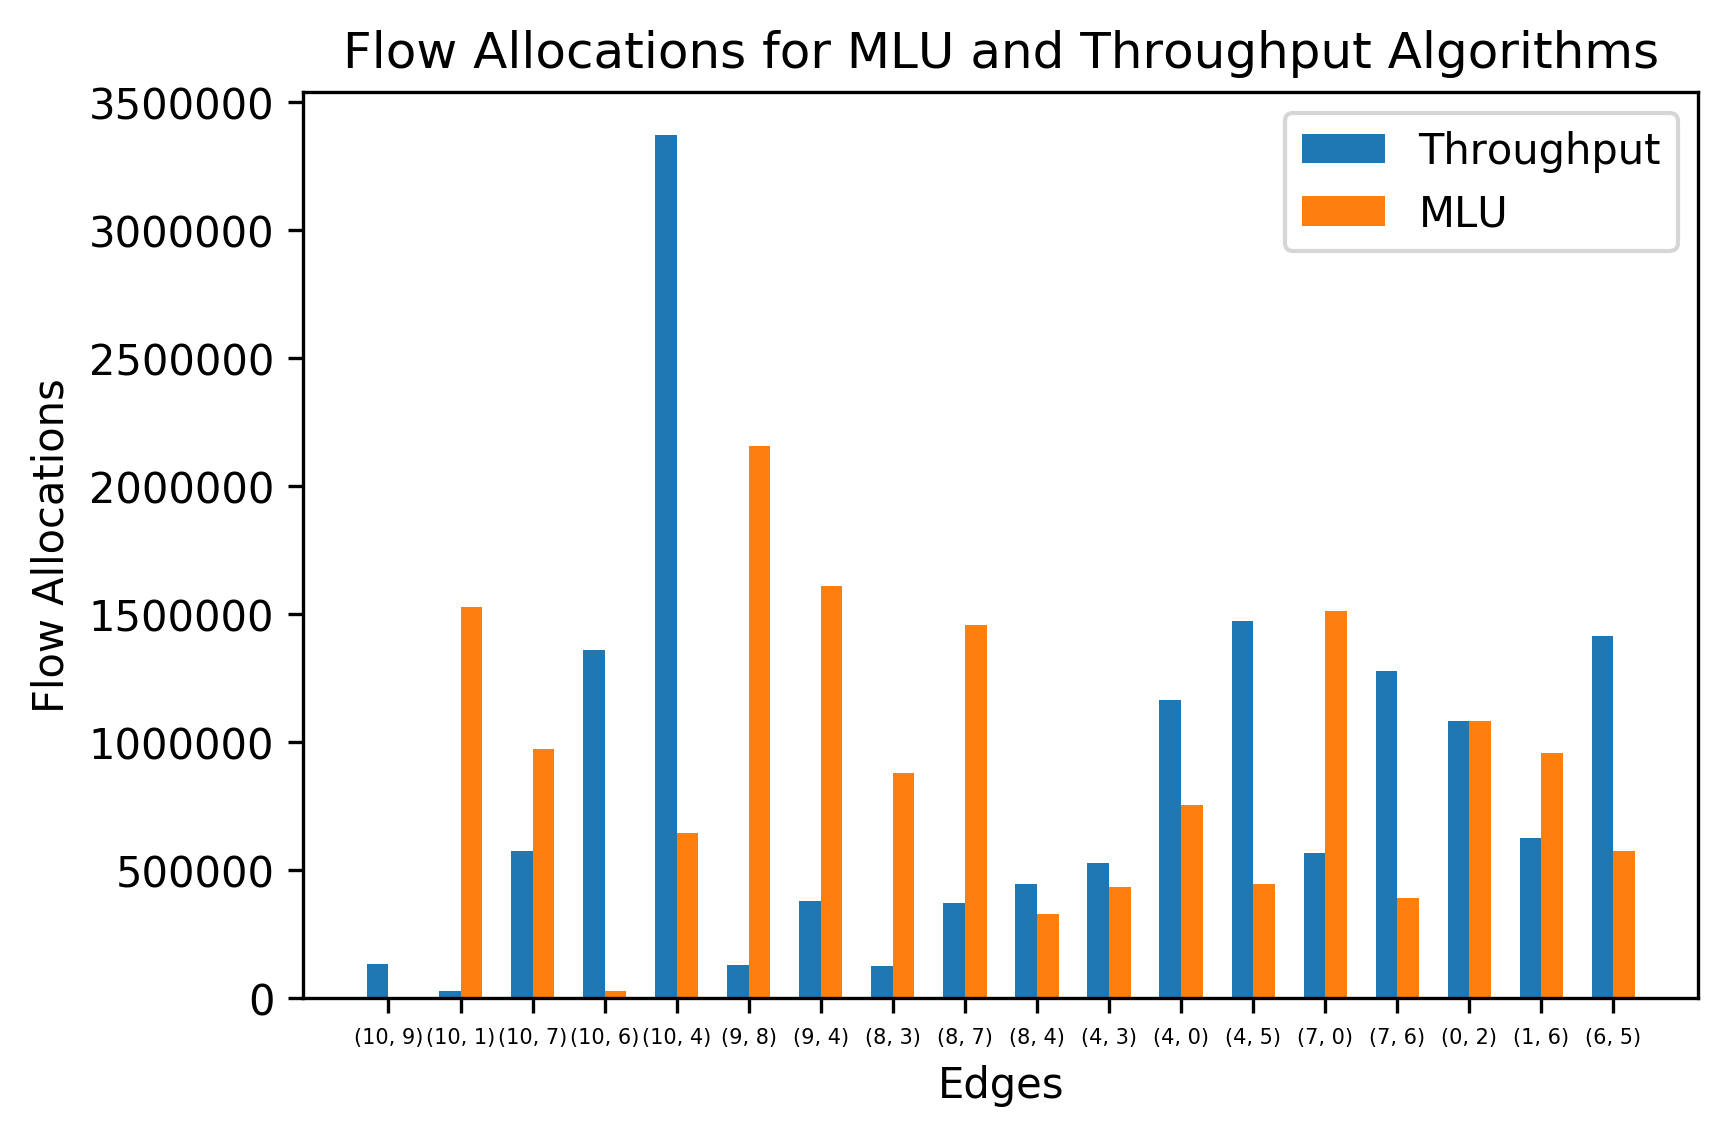

In [64]:
fig1, ax1 = plt.subplots()

ind = np.arange(len(edge_flow_4.keys()))
width = 0.3

ax1.set_title("Flow Allocations for MLU and Throughput Algorithms")
ax1.set_xlabel('Edges')
ax1.set_ylabel('Flow Allocations')
bar1 = ax1.bar(ind, edge_flow_4.values(), width, label="Throughput")
bar2 = ax1.bar(ind + width, edge_flow_5.values(), width, label="MLU")

plt.xticks(ind + width / 2, edge_flow_4.keys(), fontsize=5)
plt.legend(loc='best')
plt.show()

## Step 7 (EXTRA CREDIT): Scaling with Topology Size